In [417]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [430]:
import codecs
with codecs.open("data/rules.csv", "r", "Shift-JIS", "ignore") as file:
    rules = pd.read_table(file, delimiter=",")

In [2]:
classifier_df = pd.DataFrame(index = range(130))
#classifiers = {}
for filename in os.listdir("./data/rule importance/"):
    filepath = "./data/rule importance/" + filename
    df = pd.read_csv(filepath)

    classifier_df[filename] = df['rule_id']

In [20]:
classifier_df

rules_00.csv         rules_01.csv         rules_02.csv  \
0    5237260000000836259  5237260000000939134  5237260000000836259   
1    5237260000000939134  5237260000000836259  5237260000000939134   
2    5237260000000836261             HIT_FLG5  5237260000000836261   
3               HIT_FLG5  5237260000000836261             HIT_FLG5   
4    5237260000000836231  5237260000000836231  5237260000000836231   
5    5237260000000836238  5237260000000836238  5237260000000836238   
6               HIT_FLG3             HIT_FLG3             HIT_FLG3   
7               HIT_FLG6             HIT_FLG6             HIT_FLG6   
8    5237260000000939117  5237260000000939117  5237260000001063213   
9    5237260000001063213  5237260000001063213  5237260000000939117   
10   5237260000001063233             HIT_FLG2             HIT_FLG2   
11   5237260000000939113  5237260000001063233  5237260000000939113   
12              HIT_FLG2  5237260000000939113  5237260000001063233   
13              HIT_FLG8             HIT_FLG8  5237260000000935173   
14   5237260000000935173  5237260000000836149  5237260000000836149   
15   5237260000000836149  5237260000000935173             HIT_FLG8   
16   5237260000000836142  5237260000000836142  5237260000000836142   
17   5237260000000938853             HIT_FLG4  5237260000000938853   
18              HIT_FLG4  5237260000000938853             HIT_FLG4   
19   5237260000000939175  5237260000000939175  5237260000000939175   
20   5237260000001025233  5237260000001025233  5237260000001025233   
21   5237260000000933894  5237260000000933894  5237260000000933894   
22   5237260000000939253  5237260000000836262  5237260000000939253   
23   5237260000000836262  5237260000000939253  5237260000000939248   
24   5237260000000939248  5237260000000939248  5237260000000836262   
25   5237260000000933893  5237260000000933893  5237260000000933893   
26   5237260000000933901  5237260000000933901  5237260000000939255   
27   5237260000000836370  5237260000000836370  5237260000000933901   
28   5237260000000836145  5237260000000939255  5237260000000836145   
29   5237260000000939255  5237260000000836145  5237260000000836370   
..                   ...                  ...                  ...   
100  5237260000000939196  5237260000000939196  5237260000000939241   
101  5237260000000836146  5237260000000836146  5237260000000939221   
102  5237260000000939221  5237260000000939241  5237260000000939225   
103  5237260000000836153  5237260000000939219  5237260000000939154   
104  5237260000000939225  5237260000000836153  5237260000000939203   
105  5237260000000939096  5237260000000836147  5237260000001081293   
106  5237260000000939154  5237260000000939221  5237260000000939219   
107  5237260000000939214  5237260000001081293  5237260000000836159   
108  5237260000001081293  5237260000000939214  5237260000000935293   
109  5237260000000939203  5237260000000939096  5237260000000939214   
110  5237260000000933934  5237260000000933934  5237260000000939096   
111  5237260000000836147  5237260000000935293  5237260000000939201   
112  5237260000000939219  5237260000000939203  5237260000000836147   
113  5237260000000836159  5237260000000935213  5237260000000836153   
114  5237260000000935213  5237260000000939154  5237260000000935213   
115  5237260000000935293  5237260000001018073  5237260000000933934   
116  5237260000001018073  5237260000000935174  5237260000000939197   
117  5237260000000939197  5237260000000836148  5237260000000836146   
118  5237260000000939201  5237260000000939225  5237260000001018073   
119  5237260000000836148  5237260000000836235  5237260000000935174   
120  5237260000000935174  5237260000000939197  5237260000000836157   
121  5237260000001063215  5237260000000939201  5237260000000933958   
122  5237260000000836235  5237260000000933958  5237260000000836151   
123  5237260000000836151  5237260000000836157  5237260000000933915   
124  5237260000000836157  5237260000000939218  5237260000000939218   
125  52372600000009339

In [21]:
list_jaccard_dict = {}

for column1 in classifier_df.columns.values:
    column1_dict = {}
    
    for column2 in classifier_df.columns.values:
        if column1 == column2:
            jaccard = 1
            column1_dict[column2] = jaccard
            
        else:
            intersection = (len(pd.merge(classifier_df[column1].dropna().to_frame(),
                                         classifier_df[column2].dropna().to_frame(), 
                                        how = 'inner', left_on = column1, right_on = column2)))
            union = len(classifier_df[column1].dropna()) + len(classifier_df[column2].dropna()) - intersection
            jaccard = intersection/union
            column1_dict[column2] = jaccard
        
    
    list_jaccard_dict[column1] = column1_dict
    
jaccard_df = pd.DataFrame.from_dict(list_jaccard_dict)



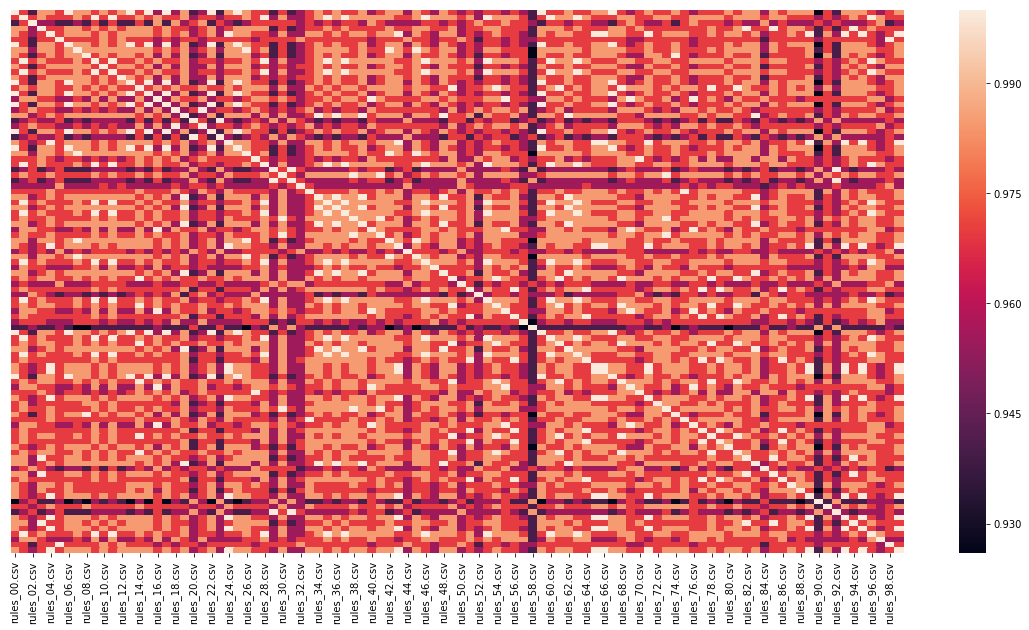

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
datamap = sns.heatmap(jaccard_df, ax=ax, yticklabels = False)
datamap

In [53]:
df = pd.read_csv("./data/rule importance/rules_00.csv",dtype = {'importance': np.float64})

In [54]:
df['rules_00'] = 'rules_00'

In [55]:
df = df.T

In [56]:
df.columns = df.iloc[0]

In [57]:
df=df.reindex(df.index.drop(['rules_00','rule_id'])).rename(index={'importance':''})

In [118]:
df2 = pd.read_csv("./data/rule importance/rules_01.csv",dtype = {'importance': np.float64,'rule_id':np.object})
df2['rules_01'] = 'rules_01'
df2 = df2.T
df2.columns = df2.iloc[0]
df2=df2.reindex(df2.index.drop(['rules_01','rule_id'])).rename(index={'importance':'rules_01'})

In [119]:
df2

rule_id  5237260000000939134 5237260000000836259           HIT_FLG5  \
rules_01   0.133764858107743   0.129420954186467  0.116030250190572   

rule_id  5237260000000836261 5237260000000836231 5237260000000836238  \
rules_01   0.111361770873399  0.0712028330501346  0.0459615111800319   

rule_id             HIT_FLG3            HIT_FLG6 5237260000000939117  \
rules_01  0.0355140020678113  0.0306675575950597  0.0249500553867453   

rule_id  5237260000001063213   ...    5237260000001112953 5237260000001113833  \
rules_01  0.0242407572123521   ...                      0                   0   

rule_id  5237260000001113894 5237260000001113895 5237260000001113896  \
rules_01                   0                   0                   0   

rule_id  5237260000001113897 5237260000001113898 5237260000001118133 HIT_FLGB  \
rules_01                   0                   0                   0        0   

rule_id  HIT_FLGE  
rules_01        0  

[1 rows x 317 columns]

In [60]:
df0 = pd.DataFrame()
pd.concat([df0,df,df2])

C:\Users\maxime.menu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


5237260000000836140 5237260000000836141 5237260000000836142  \
          0.000382185354766122                   0  0.0125210925950261   
rules_01  0.000323865871546046                   0  0.0142577046475774   

         5237260000000836143 5237260000000836144  5237260000000836145  \
                           0                   0  0.00327432057186251   
rules_01                   0                   0  0.00340833300781836   

           5237260000000836146   5237260000000836147   5237260000000836148  \
          1.30312072778631e-05  5.07876518572415e-06  1.81100963654469e-06   
rules_01  1.51768742164787e-05  8.26087071689265e-06  1.72809854938102e-06   

         5237260000000836149         ...                     HIT_FLG6  \
           0.015016677706603         ...           0.0318389532627619   
rules_01  0.0155869344735378         ...           0.0306675575950597   

                     HIT_FLG7            HIT_FLG8              HIT_FLG9  \
           0.0021375661170918  0.0163423946196318  0.000957854778332272   
rules_01  0.00224433153635067  0.0159385511528897  0.000989795517085871   

                     HIT_FLGA HIT_FLGB             HIT_FLGC  \
          0.00207527265813973        0  0.00261901968973124   
rules_01   0.0020055565877256        0  0.00234233734022011   

                      HIT_FLGD HIT_FLGE             HIT_FLGF  
          0.000207423528932786        0  0.00148258783745356  
rules_01  0.000206960490301888        0  0.00152088357302125  

[2 rows x 317 columns]

In [3]:
pd.set_option('precision',15)

class_df = pd.DataFrame()

for filename in os.listdir("./data/rule importance/"):
    filepath = "./data/rule importance/" + filename
    csv_ind = filename.find('.csv')
    col1 = filename[0:csv_ind]
    ex = (pd.read_csv(filepath, dtype = {'importance': np.float64,'rule_id':np.object}))
    ex[col1] = col1
    ex = ex.T
    ex.columns = ex.iloc[0]
    ex = ex.reindex(ex.index.drop([col1,'rule_id'])).rename(index={'importance': col1})
    class_df = class_df.append(ex)
    
class_df = class_df.fillna(0)
class_df

C:\Users\maxime.menu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


5237260000000836140  5237260000000836141  5237260000000836142  \
rules_00    0.000382185354766                  0.0    0.012521092595026   
rules_01    0.000323865871546                  0.0    0.014257704647577   
rules_02    0.000368676442630                  0.0    0.012344818301192   
rules_03    0.000338213215376                  0.0    0.014176292583370   
rules_04    0.000362632366388                  0.0    0.013060502988730   
rules_05    0.000376393629429                  0.0    0.014724324781745   
rules_06    0.000366645886126                  0.0    0.013816726073785   
rules_07    0.000379310308147                  0.0    0.012825126269324   
rules_08    0.000408540361340                  0.0    0.012222127756473   
rules_09    0.000367316257157                  0.0    0.013094191701862   
rules_10    0.000363380822040                  0.0    0.013493655286918   
rules_11    0.000318273256143                  0.0    0.013059400326404   
rules_12    0.000418779635484                  0.0    0.012503658142234   
rules_13    0.000374094139556                  0.0    0.012007677962575   
rules_14    0.000370904521163                  0.0    0.011997420830491   
rules_15    0.000407608144899                  0.0    0.012122579366875   
rules_16    0.000386294853942                  0.0    0.013450876552232   
rules_17    0.000380289108100                  0.0    0.011804869214592   
rules_18    0.000331102912359                  0.0    0.011548741217431   
rules_19    0.000404204595809                  0.0    0.012031414060908   
rules_20    0.000334404883760                  0.0    0.013116244028904   
rules_21    0.000357379865759                  0.0    0.011541782148527   
rules_22    0.000357529959750                  0.0    0.011316637882638   
rules_23    0.000391259674155                  0.0    0.012832657187659   
rules_24    0.000361400167953                  0.0    0.012460269613638   
rules_25    0.000353852961292                  0.0    0.011753019939038   
rules_26    0.000356793775788                  0.0    0.012526690275253   
rules_27    0.000373653063862                  0.0    0.011743732830071   
rules_28    0.000361665452074                  0.0    0.013935062902358   
rules_29    0.000348351855865                  0.0    0.011468087196905   
...                       ...                  ...                  ...   
rules_70    0.000375990160199                  0.0    0.012835177780268   
rules_71    0.000416607254751                  0.0    0.014956007145576   
rules_72    0.000352917870508                  0.0    0.012602568122180   
rules_73    0.000407791070189                  0.0    0.012759253480293   
rules_74    0.000351776085139                  0.0    0.012295451729600   
rules_75    0.000372066611407                  0.0    0.012080769929820   
rules_76    0.000381491838641                  0.0    0.012107472455614   
rules_77    0.000410444750187                  0.0    0.012076173558995   
rules_78    0.000367143677867                  0.0    0.012104404089569   
rules_79    0.000376715566022                  0.0    0.011282056592052   
rules_80    0.000369201390867                  0.0    0.011705653169325   
rules_81    0.000368366587080                  0.0    0.012395037128684   
rules_82    0.000388397897494                  0.0    0.011832672131830   
rules_83    0.000359387382354                  0.0    0.012593422316562   
rules_84    0.000360336360530                  0.0    0.012632821296185   
rules_85    0.000343011324766                  0.0    0.012639523037315   
rules_86    0.000386669066199                  0.0    0.013115937248124   
rules_87    0.000383724589749                  0.0    0.011912151279677   
rules_88    0.000389005729173                  0.0    0.013032268361861   
rules_89    0.000372481527316                  0.0    0.012575675258617   
rules_90    0.000357770718670                  0.0    0.012658573812428   
rules_91    0.000356154786149      

In [4]:
av = class_df.mean().sort_values(ascending = False)
av = pd.DataFrame(av)

In [101]:
av.to_csv('data/rule ranking.csv')

In [11]:
import codecs
with codecs.open("data/rules.csv", "r", "Shift-JIS", "ignore") as file:
    rules = pd.read_table(file, delimiter=",")

In [5]:
av.reset_index(level=0, inplace=True)

In [6]:
av.columns = ['rule_id','importance']

In [124]:
merge_df = pd.merge(av,rules, on = 'rule_id', how='inner')

In [127]:
merge_df.to_csv('data/ranked rules.csv',index=False)

In [414]:
classifier_df = pd.DataFrame(index = range(100))
#classifiers = {}
for filename in os.listdir("./data/rule importance_logreg/"):
    filepath = "./data/rule importance_logreg/" + filename
    df = pd.read_csv(filepath)

    classifier_df[filename] = df['rule_id']

In [415]:
list_jaccard_dict = {}

for column1 in classifier_df.columns.values:
    column1_dict = {}
    
    for column2 in classifier_df.columns.values:
        if column1 == column2:
            jaccard = 1
            column1_dict[column2] = jaccard
            
        else:
            intersection = (len(pd.merge(classifier_df[column1].dropna().to_frame(),
                                         classifier_df[column2].dropna().to_frame(), 
                                        how = 'inner', left_on = column1, right_on = column2)))
            union = len(classifier_df[column1].dropna()) + len(classifier_df[column2].dropna()) - intersection
            jaccard = intersection/union
            column1_dict[column2] = jaccard
        
    
    list_jaccard_dict[column1] = column1_dict
    
jaccard_df = pd.DataFrame.from_dict(list_jaccard_dict)

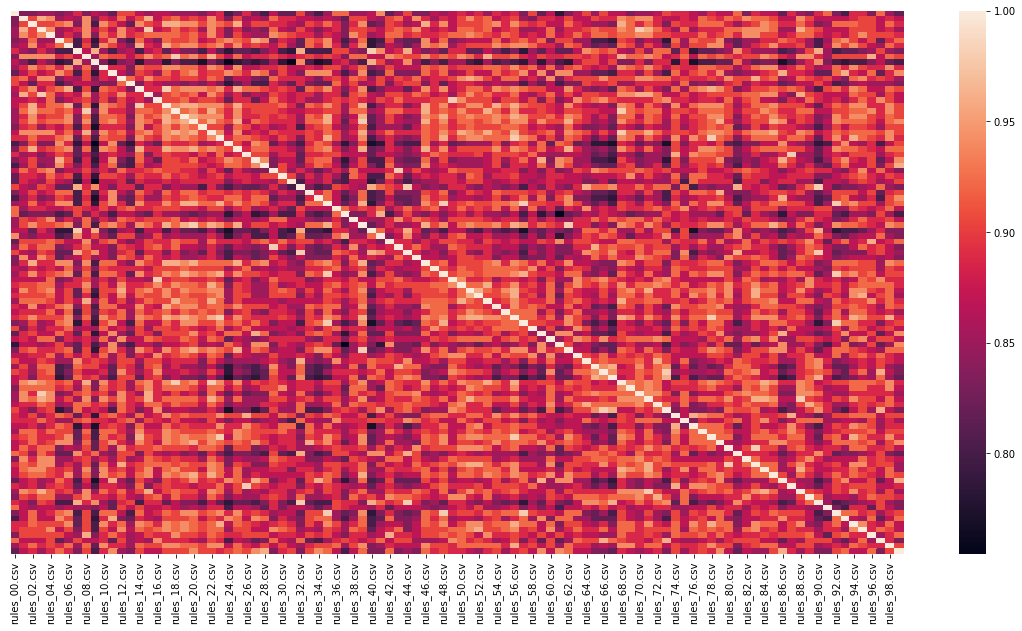

In [418]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
datamap = sns.heatmap(jaccard_df, ax=ax, yticklabels = False)
datamap

In [532]:
class_df = pd.DataFrame()

for filename in os.listdir("./data/rule importance_logreg/"):
    filepath = "./data/rule importance_logreg/" + filename
    csv_ind = filename.find('.csv')
    col1 = filename[0:csv_ind]
    ex = (pd.read_csv(filepath, dtype = {'importance': np.float64,'rule_id':np.object}))
    ex[col1] = col1
    ex = ex.T
    ex.columns = ex.iloc[0]
    ex = ex.reindex(ex.index.drop([col1,'rule_id'])).rename(index={'importance': col1})
    class_df = class_df.append(ex)
    
class_df = class_df.fillna(0)
class_df

C:\Users\maxime.menu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


5237260000000836142  5237260000000836145  5237260000000836149  \
rules_00                   0.0                  0.0   -6.513116781658058   
rules_01                   0.0                  0.0    0.000000000000000   
rules_02                   0.0                  0.0   -6.281247640632722   
rules_03                   0.0                  0.0    0.000000000000000   
rules_04                   0.0                  0.0   -1.306123549099800   
rules_05                   0.0                  0.0   -4.780883676476175   
rules_06                   0.0                  0.0   -4.767021694272762   
rules_07                   0.0                  0.0    0.000000000000000   
rules_08                   0.0                  0.0   -0.235087516874943   
rules_09                   0.0                  0.0    0.000000000000000   
rules_10                   0.0                  0.0   -6.305584828934832   
rules_100                  0.0                  0.0   -0.968313462873497   
rules_101                  0.0                  0.0   -4.664501083279577   
rules_102                  0.0                  0.0   -5.628602498477338   
rules_103                  0.0                  0.0    0.000000000000000   
rules_104                  0.0                  0.0   -2.009767083273836   
rules_105                  0.0                  0.0   -4.699633065154170   
rules_106                  0.0                  0.0   -5.184401094668977   
rules_107                  0.0                  0.0   -5.007903721235187   
rules_108                  0.0                  0.0   -3.750199088255546   
rules_109                  0.0                  0.0   -0.266909287469034   
rules_11                   0.0                  0.0   -5.003446047947389   
rules_110                  0.0                  0.0   -4.790635084621535   
rules_111                  0.0                  0.0   -4.932699360490671   
rules_112                  0.0                  0.0   -4.138900436172877   
rules_113                  0.0                  0.0   -5.449142119394430   
rules_114                  0.0                  0.0   -0.765216136391206   
rules_115                  0.0                  0.0   -5.385042687065591   
rules_116                  0.0                  0.0   -0.025603627792616   
rules_117                  0.0                  0.0   -6.770521562576929   
...                        ...                  ...                  ...   
rules_972                  0.0                  0.0    0.000000000000000   
rules_973                  0.0                  0.0    0.000000000000000   
rules_974                  0.0                  0.0   -5.102063980187697   
rules_975                  0.0                  0.0    0.000000000000000   
rules_976                  0.0                  0.0   -5.755937828161849   
rules_977                  0.0                  0.0   -0.395511088138907   
rules_978                  0.0                  0.0   -3.114550158243848   
rules_979                  0.0                  0.0   -0.917173378887966   
rules_98                   0.0                  0.0   -1.903316828192801   
rules_980                  0.0                  0.0   -1.838526014592601   
rules_981                  0.0                  0.0   -3.374496285931479   
rules_982                  0.0                  0.0   -4.333947903222732   
rules_983                  0.0                  0.0   -5.498937201681929   
rules_984                  0.0                  0.0   -4.756867932196955   
rules_985                  0.0                  0.0   -3.441656543388981   
rules_986                  0.0                  0.0    0.000000000000000   
rules_987                  0.0                  0.0   -5.059405678920999   
rules_988                  0.0                  0.0   -3.089530479772157   
rules_989                  0.0                  0.0   -0.034067028786648   
rules_99                   0.0                  0.0   -1.660015311810008   
rules_990                  0.0                  0.0   -3.77

In [533]:
av = class_df.mean().sort_values(ascending = False)
av = pd.DataFrame(av)
av.reset_index(level=0, inplace=True)

In [535]:
av.columns = ['rule_id','importance']
merge_df = pd.merge(av,rules, on = 'rule_id', how='inner')
merge_df.to_csv('data/ranked rules_logreg.csv',index=False)

In [536]:
av

rule_id          importance
0    5237260000000935173   0.648852273969555
1    5237260000001063213   0.071299163761552
2                 Flag_C   0.068923939427414
3                 Flag_8   0.006800367572373
4                 Flag_Q   0.001785918114948
5    5237260000000939097   0.000000000000000
6    5237260000000939033   0.000000000000000
7    5237260000000939034   0.000000000000000
8    5237260000000939053   0.000000000000000
9    5237260000000939054   0.000000000000000
10   5237260000000939073   0.000000000000000
11   5237260000000939093   0.000000000000000
12   5237260000000939094   0.000000000000000
13   5237260000000939095   0.000000000000000
14   5237260000000939096   0.000000000000000
15                Flag_Y   0.000000000000000
16   5237260000000939154   0.000000000000000
17   5237260000000935294   0.000000000000000
18   5237260000000939220   0.000000000000000
19   5237260000000939243   0.000000000000000
20   5237260000000939253   0.000000000000000
21   5237260000000939255   0.000000000000000
22   5237260000001015754   0.000000000000000
23   5237260000001018073   0.000000000000000
24   5237260000001018074   0.000000000000000
25   5237260000001018659   0.000000000000000
26   5237260000001018662   0.000000000000000
27   5237260000001018663   0.000000000000000
28   5237260000000939014   0.000000000000000
29                Flag_Z   0.000000000000000
..                   ...                 ...
116  5237260000000836373  -0.318756483190260
117  5237260000000933901  -0.342355569927251
118               Flag_G  -0.359857086813330
119  5237260000000836366  -0.431927045123762
120  5237260000000939245  -0.445780679660959
121  5237260000000836370  -0.449285157673479
122  5237260000000836371  -0.703885358819289
123  5237260000000938853  -0.816452682837800
124  5237260000000836262  -0.927581673315130
125  5237260000000939113  -1.013475976997230
126  5237260000000836368  -1.086872973089434
127  5237260000000836372  -1.109986846087641
128               Flag_B  -1.175563382120958
129  5237260000000836374  -1.313734240100967
130               Flag_V  -1.653933974903606
131  5237260000000836261  -1.858444232046600
132               Flag_S  -1.927361526147451
133  5237260000000836259  -2.034323862922659
134  5237260000000836260  -2.597983986502415
135  5237260000000836339  -2.750002394046540
136  5237260000000836231  -2.849509371446101
137  5237260000000836383  -2.962069953891146
138  5237260000000836149  -3.507195987128351
139  5237260000000939247  -4.600898578004429
140  5237260000000939117  -6.846176073202229
141  5237260000000933895 -10.648076092824219
142  5237260000000933874 -12.228907062465897
143  5237260000000939134 -13.500239865837891
144  5237260000000939175 -13.632068395340383
145  5237260000000933894 -14.158170410216817

[146 rows x 2 columns]

In [423]:
def removescore(x):
    rules= []
    for i in range(len(x)-1):
        rules.append(x[i].split(':')[0])
    return rules

In [424]:
fraud_df = pd.read_csv('data/Jalan_Ext_Tran_Chargeback_JIR_JALAN_20180625152817.csv',usecols=['トランザクションID','トリップしたルール'],
                      encoding='SHIFT-JIS')
fraud_df['トリップしたルール'] = fraud_df['トリップしたルール'].str.split(';')
fraud_df.dropna(inplace=True)
fraud_df['トリップしたルール'] = fraud_df.apply(lambda x: removescore(x['トリップしたルール']),axis=1)
fraud_df['不正'] = 1

In [425]:
normal_df = pd.read_csv('data/Jalan_Ext_Tran_Not_Chargeback_JIR_JALAN_20180625161404.csv',usecols=['トランザクションID','トリップしたルール'],
                      encoding='SHIFT-JIS')
normal_df['トリップしたルール'] = normal_df['トリップしたルール'].str.split(';')
normal_df.dropna(inplace=True)
normal_df['トリップしたルール'] = normal_df.apply(lambda x: removescore(x['トリップしたルール']),axis=1)
normal_df['不正'] = 0

In [1136]:
av = av[av['importance'] != 0]
av['abs_OR'] = np.exp(np.absolute(av['importance']))
av['log'] = np.log(np.absolute(av['importance']))

In [1138]:
av['log']

0     -0.432550209189866
1     -2.640870680080147
2     -2.674751709533221
3     -4.990778613500276
4     -6.327822645872183
101   -8.723904132722486
102   -7.420644170452598
103   -7.062653365584863
104   -6.964892613992563
105   -6.935417694722040
106   -6.786200812792997
107   -5.447374406451717
108   -5.418449909090945
109   -5.124726221038530
110   -4.572397993418476
111   -3.319774735260908
112   -2.616544688210368
113   -1.366721225099273
114   -1.248784686900370
115   -1.150508346915842
116   -1.143327843295920
117   -1.071905403860687
118   -1.022048307423912
119   -0.839498582027686
120   -0.807928197549684
121   -0.800097497786235
122   -0.351139778670625
123   -0.202786319459917
124   -0.075174430894760
125    0.013385983616890
126    0.083304741227083
127    0.104348164882532
128    0.161747506830620
129    0.272873647019823
130    0.503156677366773
131    0.619739703335137
132    0.656151982706009
133    0.710163509593879
134    0.954735754450511
135    1.011601782240479


In [461]:
unchangeable = pd.read_csv('data/Run2_change_impossible.csv',usecols=['rule_id','score'],dtype = {'rule_id': np.object})

In [1177]:
def calculatePrevious(x,scores):
    tripped_df = pd.DataFrame(x['トリップしたルール'])
    tripped_df.columns = ['rule_id']
    tripped_score = pd.merge(tripped_df,unchangeable,on='rule_id',how='inner')
    return tripped_score['score'].sum()

def calculateNewScores(scores,i,c)
    scores['new_score'] = scores.apply(lambda x: (x['abs_OR'] * -i * np.sign(x['importance'] + c))//100*100, axis = 1)
    return scores['new_score']

def calculateTotal(x,scores):
    tripped_df = pd.DataFrame(x['トリップしたルール'])
    tripped_df.columns = ['rule_id']
    tripped_score = pd.merge(tripped_df,av,on='rule_id',how='inner')
    return tripped_score['score'].sum() + x['previous_rules_total']

def comparescore(x,compare):
    if compare == '<':
        if x['total'] < 5000:
            return 1
        else:
            return 0
    elif compare == '>':
        if x['total'] >= 5000:
            return 1
        else:
            return 0
        
def getPredictionCounts(data,scores):
    data['total'] = data.apply(lambda x: calculateTotal(x,scores),axis=1)
    data['prediction_correct'] = data.apply(lambda x: comparescore(x,comp),axis = 1)
    correct = data['prediction_correct'].value_counts()
    if 0 not in correct.index.values:
        correct[0] = 0
    elif 1 not in correct.index.values:
        correct[1] = 0

    return correct

In [1075]:
fraud_df['previous_rules_total'] = fraud_df.apply(lambda x: calculatePrevious(x,unchangeable),axis=1)
normal_sample = normal_df.sample(frac=0.1)
normal_df['previous_rules_total'] = normal_df.apply(lambda x: calculatePrevious(x,unchangeable),axis=1)

In [839]:
fraud_df

トランザクションID                                          トリップしたルール  \
0     20171030191432542620  [5237260000000935273, 5237260000000935276, 523...   
1     20170926230253030541  [5237260000000933893, 5237260000000933894, 523...   
2     20170929132002070256  [5237260000000836364, 5237260000000836368, 523...   
3     20170929134720070633  [5237260000000836367, 5237260000000933893, 523...   
4     20171001212518106469  [5237260000000939247, 5237260000000933893, 523...   
5     20171001234015109436  [5237260000000935194, 5237260000000935273, 523...   
6     20171001234230109475  [5237260000000935194, 5237260000000935273, 523...   
7     20171003210610141759  [5237260000000836365, 5237260000000836369, 523...   
8     20171003211035141860  [5237260000000836365, 5237260000000836369, 523...   
9     20171018152503366243  [5237260000000939246, 5237260000000836367, 523...   
10    20171024151004454379  [5237260000000836367, 5237260000000836371, 523...   
11    20171027164213498644  [5237260000000939246, 5237260000000836365, 523...   
12    20171028003620505082  [5237260000000935273, 5237260000000935276, 523...   
13    20171028003748505092  [5237260000000935273, 5237260000000935276, 523...   
14    20171215185828175385  [5237260000000939254, 5237260000000939245, 523...   
15    20171220234638240156  [5237260000000939247, 5237260000000933893, 523...   
16    20180109230406474021  [5237260000000939255, 5237260000000933901, 523...   
17    20171031100423550611  [5237260000000935273, 5237260000000935274, 523...   
18    20171031215534560178  [5237260000000935214, 5237260000000935274, 523...   
19    20171031223511561044  [5237260000000935213, 5237260000000935274, 523...   
20    20171101224813577401  [5237260000000935275, 5237260000001015756, 523...   
21    20180109225718473884  [5237260000000939255, 5237260000000933901, 523...   
22    20171028004347505132  [5237260000000935273, 5237260000000935276, 523...   
23    20171030104727535197         [5237260000000836261, 5237260000000939117]   
24    20171030190723542536  [5237260000001015756, 5237260000000939253, 523...   
25    20171031095654550524  [5237260000000935173, 5237260000000939253, 523...   
26    20171108234903678665  [5237260000000939253, 5237260000000939255, 523...   
27    20171129140644955743  [5237260000001025233, 5237260000000939255, 523...   
28    20171016123604332518  [5237260000000939246, 5237260000000836367, 523...   
29    20171018164356367303  [5237260000000939246, 5237260000000836364, 523...   
...                    ...                                                ...   
1744  20180201214613830899  [5237260000000933893, 5237260000000933894, 523...   
1745  20180201220226831274  [5237260000000933895, 5237260000000836238, 523...   
1746  20180201230744832654  [5237260000000933895, 5237260000000836238, 523...   
1747  20180201231107832715  [5237260000000939254, 5237260000000933895, 523...   
1748  20180202000544833754  [5237260000000836149, 5237260000000836261, 523...   
1749  20180202002246833994  [5237260000000933893, 5237260000000933894, 523...   
1750  20180202002545834036  [5237260000000933893, 5237260000000933894, 523...   
1751  20180202131122839255  [5237260000000939253, 5237260000000933893, 523...   
1752  20180202131734839344  [5237260000000939253, 5237260000000933893, 523...   
1753  20180203010714850143  [5237260000000939247, 5237260000000933894, 523...   
1754  20180203011004850163  [5237260000000939247, 5237260000000933894, 523...   
1755  20180203011539850202  [5237260000000939247, 5237260000000933893, 523...   
1756  20180204190925874764  [5237260000000939254, 5237260000000933895, 523...   
1757  20180204191535874870  [5237260000000939247, 5237260000000836238, 523...   
1758  20180422210142151938  [5237260000001063213, 5237260000001063233, 523...   
1759  20180423222313172339  [5237260000001063213, 5237260000001063233, 523...   
1760  20180504221306347071  [5237260000000939247, 5237260000000836336, 523...   
1761  20180504222906347299  [523726000000093925

In [1215]:
%%time
fraud_df['total'] = fraud_df.apply(lambda x: calculateTotal(x,av,30,0),axis=1)

Wall time: 7.95 s


In [1216]:
fraud_df['prediction_correct'] = fraud_df.apply(lambda x: comparescore(x,'>'),axis=1)

In [1217]:
fraud_correct = fraud_df['prediction_correct'].value_counts()

In [1218]:
fraud_correct

0    1600
1     174
Name: prediction_correct, dtype: int64

In [1112]:
normal_sample = normal_df.sample(frac=0.1)

In [1219]:
%%time
normal_sample['total'] = normal_sample.apply(lambda x: calculateTotal(x,av,30,0),axis=1)

Wall time: 4min 1s


In [1220]:
normal_sample['prediction_correct'] = normal_sample.apply(lambda x: comparescore(x,'<'),axis=1)

In [1221]:
normal_correct = normal_sample['prediction_correct'].value_counts()

In [1222]:
normal_correct

1    58628
0      705
Name: prediction_correct, dtype: int64

In [1209]:
fraud_correct[1] = 0

In [1223]:
cm = [[fraud_correct[1],fraud_correct[0]],[normal_correct[0],normal_correct[1]]]

In [1224]:
cm

[[174, 1600], [705, 58628]]

In [1225]:
calcFscore(cm)

0.13117225782133435

In [1226]:
calcAccuracy(cm)

0.9622792806061499

In [1227]:
calcFPR(cm)

0.011882089225220367

In [1128]:
stdcm(cm)

[[0.4278466741826381, 0.5721533258173619],
 [0.011494446598014596, 0.9885055534019854]]

In [938]:
def calcFscore(cm):
    return 2*cm[0][0]/(2*cm[0][0] + cm[1][0] + cm[0][1])

def calcTPR(cm):
    return cm[0][0]/(cm[0][0] + cm[0][1])

def calcFPR(cm):
    return cm[1][0]/(cm[1][0] + cm[1][1])

def calcAccuracy(cm):
    return (cm[0][0] + cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

def stdcm(cm):
    total1 = cm[1][0] + cm[1][1]
    total0 = cm[0][1] + cm[0][0]
    
    return [[cm[0][0]/total0,cm[0][1]/total0],[cm[1][0]/total1,cm[1][1]/total1]]

In [1199]:
import time
def simulate(fraud,normal,count):
    simulation = []
    path = 'data/simulation_results3.csv'
    
    header = ('multiplication factor' + '\t' + 'addition factor' + '\t' + 'f1 score' + '\t' 
              + 'accuracy' + '\t' + 'FPR' + '\t' + 'TPR' + '\n')
    with open(path, 'w') as md:
        md.write(header)
        
    for i in range(0,200,10):

        j = -500
        t1 = time.clock()
        #data,scores,i,comp,c=0
        count['new_score'] = calculateNewScores(scores,i,j)
        fraud_correct  = getPredictionCounts(data = fraud, scores = count, comp='>')
        normal_correct = getPredictionCounts(data = normal,scores = count, comp = '<')
        cm = [[fraud_correct[1],fraud_correct[0]],[normal_correct[0],normal_correct[1]]]
        f = calcFscore(cm)
        tpr = calcTPR(cm)
        fpr = calcFPR(cm)
        a = calcAccuracy(cm)
        res = (i,j,f,a)
        simulation.append(res)

        # print metadata to txt file
        iterresults = (str(i)  + '\t' + str(j) + '\t' + str(f) + '\t' + str(a) + '\t' + str(fpr) + '\t' + str(tpr) + '\n')

        with open(path, 'a') as md:
            md.write(iterresults)

        m, s = divmod((time.clock()-t1), 60)
        h, m = divmod(m, 60)
        print(a)
        print ('runtime: ' + "%d:%02d:%02d" % (h, m, s))

    return simulation
    

In [1200]:
%%time
res = simulate(fraud_df,normal_sample,av)

0.966288641235865
runtime: 0:04:08
0.96571587543162
runtime: 0:04:05
0.9642430490778471
runtime: 0:04:04
0.9622792806061499
runtime: 0:04:03
0.9588917799924722
runtime: 0:04:08
0.9558643035986057
runtime: 0:04:03
0.9505948581995516
runtime: 0:04:03
0.9433616443288003
runtime: 0:04:03
0.9379449162943689
runtime: 0:04:04
0.9298607360858822
runtime: 0:04:04
0.9196982342448492
runtime: 0:04:02
0.909159343446741
runtime: 0:04:03
0.897851309997218
runtime: 0:04:03
0.8851522738802429
runtime: 0:04:04
0.8742697235995877
runtime: 0:04:04
0.8651218354689315
runtime: 0:04:04
0.8506226782529006
runtime: 0:04:03
0.8377436300260199
runtime: 0:04:04
0.8229826370137627
runtime: 0:04:03
0.809530822982637
runtime: 0:04:04
Wall time: 1h 21min 29s


In [402]:
4683/(4683+588644)

0.007892780877998136

In [1129]:
av['rule score'] = av['abs_OR'] * -.003 * np.sign(av['importance']) -500

In [1130]:
av['rule score'] = np.round(av['rule score'],decimals=0)

In [1131]:
changeable = pd.read_csv('data/Run1_change_possible.csv',usecols=['rule_id','score'],dtype = {'rule_id': np.object})

In [1132]:
changeable

rule_id  score
0   5237260000000836261      0
1   5237260000000836261   1600
2   5237260000000935173    100
3   5237260000000935174   2000
4   5237260000000935193   1000
5   5237260000000935194    800
6   5237260000000935213   2000
7   5237260000000935214   1000
8   5237260000000935273    800
9   5237260000000935274   1000
10  5237260000000935275    800
11  5237260000000935276    500
12  5237260000000935293   1000
13  5237260000000935294    800
14  5237260000000939013    500
15  5237260000000939014      0
16  5237260000000939033      0
17  5237260000000939034      0
18  5237260000000939053   2000
19  5237260000000939054    500
20  5237260000000939073    750
21  5237260000000939093    375
22  5237260000000939094   2000
23  5237260000000939095   1000
24  5237260000000939096   5000
25  5237260000000939097   2000
26  5237260000001015754   3000
27  5237260000001018073   3000
28  5237260000001018074   3000
29  5237260000001018074   3000
30  5237260000001018659   3000
31  5237260000001018662   3000
32  5237260000001018663   3000
33  5237260000001018665   3000
34  5237260000001018666   3000
35  5237260000001025233   3001
36  5237260000001025234   3001
37  5237260000001025234   3001
38  5237260000001055693  -2000
39  5237260000001055694  -2000
40  5237260000001055695  -2000
41  5237260000001057293   5000
42  5237260000001057294   5000
43  5237260000001057295   5000
44  5237260000001057296   5000
45  5237260000001063213   5000
46  5237260000001063214   5000
47  5237260000001063215   5000
48  5237260000001063216   5000
49  5237260000001063233  -5000
50  5237260000001063234  -5000
51  5237260000001067414   4000
52  5237260000001072121      0
53  5237260000001077302 -10000
54  5237260000001081293 -10000
55  5237260000001081294 -10000

In [1133]:
merge_df = pd.merge(av,changeable, on = 'rule_id', how='outer')
merge_df['importance'] = merge_df['importance'].fillna(0)
merge_df['abs_OR'] = merge_df['abs_OR'].fillna(1)
merge_df['rule score'] = merge_df['rule score'].fillna(0)
merge_df

rule_id         importance             abs_OR  \
0    5237260000000935173  0.648852273969555  1.913343574106582   
1    5237260000001063213  0.071299163761552  1.073902450513210   
2                 Flag_C  0.068923939427414  1.071354718195953   
3                 Flag_8  0.006800367572373  1.006823542574994   
4                 Flag_Q  0.001785918114948  1.001787513816494   
5    5237260000000935276 -0.000162650938871  1.000162664167252   
6    5237260000000836375 -0.000598763315622  1.000598942610159   
7    5237260000000836238 -0.000856502462111  1.000856869365089   
8    5237260000000836381 -0.000944464352438  1.000944910499340   
9                 Flag_F -0.000972716685223  1.000973189927529   
10   5237260000000939246 -0.001129250870242  1.001129888714078   
11   5237260000000836367 -0.004307599862406  1.004316890906603   
12   5237260000000933893 -0.004434014449086  1.004443859236419   
13   5237260000000939244 -0.005947845528554  1.005965569083335   
14   5237260000000939013 -0.010333151155654  1.010386722523405   
15   5237260000000939254 -0.036160976629601  1.036822737287547   
16   5237260000001015756 -0.073054854521904  1.075789547217480   
17   5237260000000836365 -0.254941486439164  1.290386113577453   
18   5237260000000836369 -0.286853201560437  1.332228630036325   
19   5237260000000836364 -0.316475848959062  1.372283099770685   
20   5237260000000836373 -0.318756483190260  1.375416347120419   
21   5237260000000933901 -0.342355569927251  1.408260943742774   
22                Flag_G -0.359857086813330  1.433124587522748   
23   5237260000000836366 -0.431927045123762  1.540222744302487   
24   5237260000000939245 -0.445780679660959  1.561708914442198   
25   5237260000000836370 -0.449285157673479  1.567191490166731   
26   5237260000000836371 -0.703885358819289  2.021592078835714   
27   5237260000000938853 -0.816452682837800  2.262459922986206   
28   5237260000000836262 -0.927581673315130  2.528387311759900   
29   5237260000000939113 -1.013475976997230  2.755161266970716   
..                   ...                ...                ...   
71   5237260000000939097  0.000000000000000  1.000000000000000   
72   5237260000001015754  0.000000000000000  1.000000000000000   
73   5237260000001018073  0.000000000000000  1.000000000000000   
74   5237260000001018074  0.000000000000000  1.000000000000000   
75   5237260000001018074  0.000000000000000  1.000000000000000   
76   5237260000001018659  0.000000000000000  1.000000000000000   
77   5237260000001018662  0.000000000000000  1.000000000000000   
78   5237260000001018663  0.000000000000000  1.000000000000000   
79   5237260000001018665  0.000000000000000  1.000000000000000   
80   5237260000001018666  0.000000000000000  1.000000000000000   
81   5237260000001025233  0.000000000000000  1.000000000000000   
82   5237260000001025234  0.000000000000000  1.000000000000000   
83   5237260000001025234  0.000000000000000  1.000000000000000   
84   5237260000001055693  0.000000000000000  1.000000000000000   
85   5237260000001055694  0.000000000000000  1.000000000000000   
86   5237260000001055695  0.000000000000000  1.000000000000000   
87   5237260000001057293  0.000000000000000  1.000000000000000   
88   5237260000001057294  0.000000000000000  1.000000000000000   
89   5237260000001057295  0.000000000000000  1.000000000000000   
90   5237260000001057296  0.000000000000000  1.000000000000000   
91   5237260000001063214  0.000000000000000  1.000000000000000   
92   5237260000001063215  0.000000000000000  1.000000000000000   
93   5237260000001063216  0.000000000000000  1.000000000000000   
94   5237260000001063233  0.000000000000000  1.000000000000000   
95   5237260000001063234  0.000000000000000  1.000000000000000   
96   5237260000001067414  0.000000000000000  1.000000000000000   
97   5237260000001072121  0.000000000000000  1.000000000000000   
98   5237260000001077302  0.000000000000000  1.000000000000000   
99   5237260000001081293  0.000000000000000  1.0000000000

In [1134]:
merge_df = pd.merge(merge_df,rules,on='rule_id',how='inner')
merge_df

rule_id         importance             abs_OR  \
0    5237260000000935173  0.648852273969555  1.913343574106582   
1    5237260000001063213  0.071299163761552  1.073902450513210   
2                 Flag_C  0.068923939427414  1.071354718195953   
3                 Flag_8  0.006800367572373  1.006823542574994   
4                 Flag_Q  0.001785918114948  1.001787513816494   
5    5237260000000935276 -0.000162650938871  1.000162664167252   
6    5237260000000836375 -0.000598763315622  1.000598942610159   
7    5237260000000836238 -0.000856502462111  1.000856869365089   
8    5237260000000836381 -0.000944464352438  1.000944910499340   
9                 Flag_F -0.000972716685223  1.000973189927529   
10   5237260000000939246 -0.001129250870242  1.001129888714078   
11   5237260000000836367 -0.004307599862406  1.004316890906603   
12   5237260000000933893 -0.004434014449086  1.004443859236419   
13   5237260000000939244 -0.005947845528554  1.005965569083335   
14   5237260000000939013 -0.010333151155654  1.010386722523405   
15   5237260000000939254 -0.036160976629601  1.036822737287547   
16   5237260000000836365 -0.254941486439164  1.290386113577453   
17   5237260000000836369 -0.286853201560437  1.332228630036325   
18   5237260000000836364 -0.316475848959062  1.372283099770685   
19   5237260000000836373 -0.318756483190260  1.375416347120419   
20   5237260000000933901 -0.342355569927251  1.408260943742774   
21                Flag_G -0.359857086813330  1.433124587522748   
22   5237260000000836366 -0.431927045123762  1.540222744302487   
23   5237260000000939245 -0.445780679660959  1.561708914442198   
24   5237260000000836370 -0.449285157673479  1.567191490166731   
25   5237260000000836371 -0.703885358819289  2.021592078835714   
26   5237260000000938853 -0.816452682837800  2.262459922986206   
27   5237260000000836262 -0.927581673315130  2.528387311759900   
28   5237260000000939113 -1.013475976997230  2.755161266970716   
29   5237260000000836368 -1.086872973089434  2.964987964021274   
..                   ...                ...                ...   
76   5237260000001018074  0.000000000000000  1.000000000000000   
77   5237260000001018074  0.000000000000000  1.000000000000000   
78   5237260000001018074  0.000000000000000  1.000000000000000   
79   5237260000001018659  0.000000000000000  1.000000000000000   
80   5237260000001018662  0.000000000000000  1.000000000000000   
81   5237260000001018663  0.000000000000000  1.000000000000000   
82   5237260000001018665  0.000000000000000  1.000000000000000   
83   5237260000001018666  0.000000000000000  1.000000000000000   
84   5237260000001025233  0.000000000000000  1.000000000000000   
85   5237260000001025234  0.000000000000000  1.000000000000000   
86   5237260000001025234  0.000000000000000  1.000000000000000   
87   5237260000001025234  0.000000000000000  1.000000000000000   
88   5237260000001025234  0.000000000000000  1.000000000000000   
89   5237260000001055693  0.000000000000000  1.000000000000000   
90   5237260000001055694  0.000000000000000  1.000000000000000   
91   5237260000001055695  0.000000000000000  1.000000000000000   
92   5237260000001057293  0.000000000000000  1.000000000000000   
93   5237260000001057294  0.000000000000000  1.000000000000000   
94   5237260000001057295  0.000000000000000  1.000000000000000   
95   5237260000001057296  0.000000000000000  1.000000000000000   
96   5237260000001063214  0.000000000000000  1.000000000000000   
97   5237260000001063215  0.000000000000000  1.000000000000000   
98   5237260000001063216  0.000000000000000  1.000000000000000   
99   5237260000001063233  0.000000000000000  1.000000000000000   
100  5237260000001063234  0.000000000000000  1.000000000000000   
101  5237260000001067414  0.000000000000000  1.000000000000000   
102  5237260000001072121  0.000000000000000  1.000000000000000   
103  5237260000001077302  0.000000000000000  1.000000000000000   
104  5237260000001081293  0.000000000000000  1.0000000000

In [1135]:
merge_df.to_csv('data/rule_scores_new2.csv',columns=['rule_id','rule score','rule_desc'],index=False,encoding='SHIFT-JIS')

In [946]:
res = pd.read_csv('data/simulation_results2.csv',sep='\t')

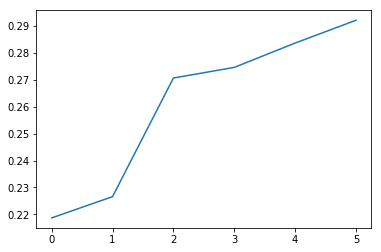

In [949]:
res['TPR'].plot()

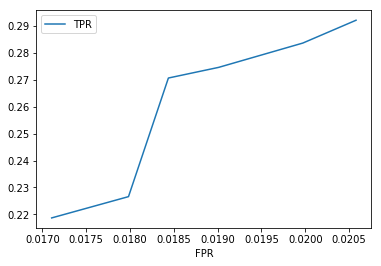

In [951]:
res.plot(x='FPR',y='TPR')